In [119]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [120]:
# Initialize Dataframe
df = pd.read_csv('./diabetes.csv', header=None)
columns = ['Times Pregnant', 'Plasma Glucose Concentration', 'Diastolic BP', 'Triceps Skinfold Thiccness', '2-Hour Serum Insulin', 'BMI', 'Diabetes Pedigree', 'Age', 'Class']
df.columns = columns
df.head()

,Times Pregnant,Plasma Glucose Concentration,Diastolic BP,Triceps Skinfold Thiccness,2-Hour Serum Insulin,BMI,Diabetes Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0, 0.5, 'Class')

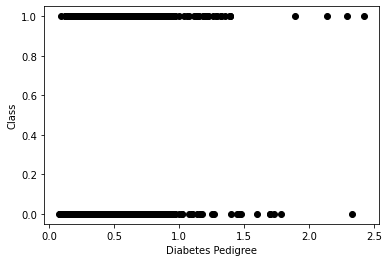

In [129]:
X = df[['Diabetes Pedigree']]
y = df['Class']

plt.scatter(X, y, c = 'black')
plt.xlabel('Diabetes Pedigree')
plt.ylabel('Class')



In [122]:
# Split Data then Create and Fit Regressors
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/5))

regressor1 = LogisticRegression(C=1.0)
regressor2 = LogisticRegression(C=3.0)
regressor3 = LogisticRegression(C=5.0)
regressor4 = LogisticRegression(C=7.0)
regressor5 = LogisticRegression(C=13.0)

regressors = [regressor1, regressor2, regressor3, regressor4, regressor5]

for reg in regressors:
  reg.fit(X_train, y_train)

Text(0, 0.5, 'Class')

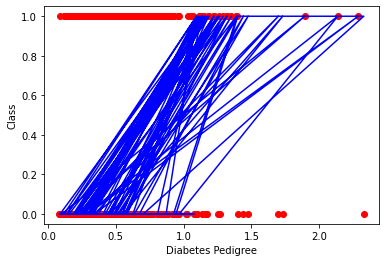

In [130]:
# View Predictions
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor1.predict(X_train), color='blue')
plt.xlabel('Diabetes Pedigree')
plt.ylabel('Class')


In [125]:
#Calculate Best Accuracy 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_pred1 = regressor1.predict(X_test_std)
y_pred2 = regressor2.predict(X_test_std)
y_pred3 = regressor3.predict(X_test_std)
y_pred4 = regressor4.predict(X_test_std)
y_pred5 = regressor5.predict(X_test_std)

y_preds = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]
max_pred = accuracy_score(y_test, y_preds[0])
max_pred_ind = 0

for i in range(len(y_preds)):
  print(f'Accuracy: {accuracy_score(y_test, y_preds[i])}')
  pred = accuracy_score(y_test, y_preds[i])
  if pred > max_pred:
    max_pred = pred
    max_pred_ind = i
print(f'Max y_pred accuracy: {accuracy_score(y_test, y_preds[max_pred_ind])}')
print(f'Best accuracy regressor index: {max_pred_ind}')


Accuracy: 0.6753246753246753
Accuracy: 0.6818181818181818
Accuracy: 0.6818181818181818
Accuracy: 0.6818181818181818
Accuracy: 0.6818181818181818
Max y_pred accuracy: 0.6818181818181818
Best accuracy regressor index: 1


In [126]:
#Confusion Matrix of Highest Accuracy Regressor y_pred
confusion_matrix(y_test, y_preds[max_pred_ind])

array([[91, 11],
       [38, 14]], dtype=int64)

In [131]:
#Misclassified Samples of Highest Accuracy Regressor y_pred
(y_test != y_preds[max_pred_ind]).sum()

49

In [132]:
#Print Last 5 Predictions
for i in range(5):
  print(y_preds[max_pred_ind][-i])

1
1
0
0
0
